# **MLOps with Pycaret and MLflow**



**Integrating PyCaret and MLflow in MLOps**

By combining **PyCaret** and **MLflow** in an MLOps workflow, we can:

- **Simplify Model Building**: Use PyCaret to automate model creation, selection, and evaluation.
- **Track Experiments and Models**: Use MLflow to log and manage models, parameters, and metrics, ensuring that every step is tracked and reproducible.




## Steps in This Lab

1. **Load the Dataset**:
   - You start by loading the **diamond** dataset from PyCaret, which contains information like carat weight, cut, color, clarity, polish, symmetry, and price of diamonds.

2. **Preprocess the Data**:
   - The data is preprocessed by handling missing values, encoding categorical features, and scaling numerical values.

3. **Train Models**:
   - Using **PyCaret**, different machine learning models are trained and evaluated to find the best-performing model.

4. **Track Experiments**:
   - **MLflow** is used to log model parameters, metrics, and other relevant details to track experiments effectively.

5. **Deploy Models**:
   - The best model is saved and deployed using **MLflow**, which helps you manage the deployment of models in production.

---

## Objective of the Lab

The lab teaches you to:
- Automate model training and evaluation using **PyCaret**.
- Track experiments and models with **MLflow**.
- Ensure models are reproducible and deployable in a real-world setting.

In [ ]:
pip install --upgrade pycaret mlflow


Note: you may need to restart the kernel to use updated packages.


### Load the Dataset from PyCaret

This step loads the **"diamond"** dataset from PyCaret. The dataset contains various features about diamonds such as carat weight, cut, color, clarity, polish, symmetry, report, and price. It is stored in the variable `data` for further analysis.

### Initialize Setup in PyCaret

This step initializes the PyCaret setup for regression tasks, using the diamond dataset. The target variable is set to Price, and the transform_target option is enabled to apply transformations if needed. Additionally, experiment logging is enabled with MLflow for tracking the experiments, and the experiment is named "diamond".

The silent=True argument ensures that the setup runs without requiring user input.

In [ ]:
# Import necessary functions from pycaret
from pycaret.regression import setup, compare_models, plot_model, finalize_model, save_model

# Load the 'diamond' dataset from PyCaret's built-in datasets
from pycaret.datasets import get_data
data = get_data('diamond')

# Ensure no missing values in the dataset for numerical columns
numerical_cols = data.select_dtypes(include='number').columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

# Ensure that 'Price' column exists and run the setup
if 'Price' not in data.columns:
    raise ValueError("'Price' column not found in the dataset")

# Initialize PyCaret setup
experiment_name = 'diamond_experiment_01'
s = setup(data,
          target='Price',
          transform_target=True,
          log_experiment=False,  # Temporarily disable logging
          experiment_name=experiment_name)

# Check if setup was successful
print(f"Experiment '{experiment_name}' setup complete!")

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


,Description,Value
0,Session id,3073
1,Target,Price
2,Target type,Regression
3,Original data shape,"(6000, 8)"
4,Transformed data shape,"(6000, 29)"
5,Transformed train set shape,"(4200, 29)"
6,Transformed test set shape,"(1800, 29)"
7,Numeric features,1
8,Categorical features,6
9,Preprocess,True


Experiment 'diamond_experiment_01' setup complete!


#### Preprocessing

In [ ]:
# Initialize PyCaret setup
experiment_name = 'diamond_experiment_01'
s = setup(data,
          target='Price',
          transform_target=True,
          log_experiment=False,  # Temporarily disable logging
          experiment_name=experiment_name)

,Description,Value
0,Session id,1309
1,Target,Price
2,Target type,Regression
3,Original data shape,"(6000, 8)"
4,Transformed data shape,"(6000, 29)"
5,Transformed train set shape,"(4200, 29)"
6,Transformed test set shape,"(1800, 29)"
7,Numeric features,1
8,Categorical features,6
9,Preprocess,True


#### Model Training

#### **Compare All Models**
This step compares various machine learning models to find the best one for predicting the target variable (Price). The compare_models() function in PyCaret evaluates multiple models based on performance metrics and automatically selects the best performing model.

The selected model is stored in the variable best for further use and tuning.

In [ ]:
# Now compare models (only after setup completes successfully)
best = compare_models()



,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,733.0732,2139370.2262,1440.3093,0.9806,0.0783,0.0579,0.6760
lightgbm,Light Gradient Boosting Machine,654.7141,2126885.7240,1426.9999,0.9805,0.0679,0.0494,0.3160
rf,Random Forest Regressor,732.1974,2241482.2832,1464.8070,0.9797,0.0773,0.0571,0.5310
gbr,Gradient Boosting Regressor,773.9633,2895420.4529,1658.2494,0.9731,0.0777,0.0576,0.2860
dt,Decision Tree Regressor,920.1227,3474161.5954,1839.3315,0.9685,0.1005,0.0732,0.1060
ada,AdaBoost Regressor,2067.0855,17991573.4799,4203.3031,0.8371,0.1894,0.1546,0.2310
knn,K Neighbors Regressor,3127.2883,37870619.3805,6127.5393,0.6528,0.3659,0.2343,0.1270
omp,Orthogonal Matching Pursuit,3471.3174,96889055.9644,9558.7030,0.0913,0.2884,0.2263,0.1020
llar,Lasso Least Angle Regression,6719.2127,122722128.5755,11063.7587,-0.1279,0.7245,0.5708,0.1120
lasso,Lasso Regression,6719.2127,122722128.5755,11063.7587,-0.1279,0.7245,0.5708,0.1100


### Check the Residuals of the Trained Model

This step visualizes the residuals of the best-trained model using the **plot_model()** function in PyCaret. By specifying the plot type as **'residuals'**, it generates a residual plot, which helps in diagnosing the model’s performance and identifying patterns that might indicate issues like non-linearity or heteroscedasticity.

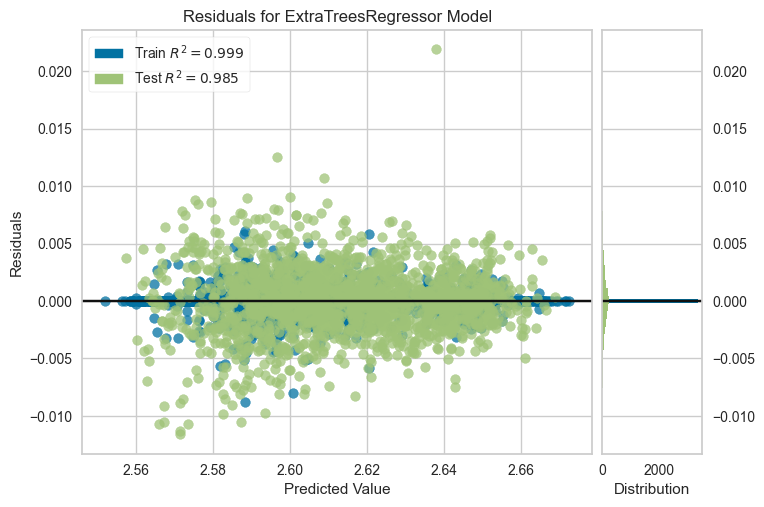

In [ ]:
# check the residuals of trained model
plot_model(best, plot = 'residuals')

### **Check Feature Importance**
This step visualizes the feature importance of the best-trained model using the plot_model() function in PyCaret. By specifying the plot type as 'feature', it generates a feature importance plot, which helps in understanding which features (variables) contribute the most to the model’s predictions.

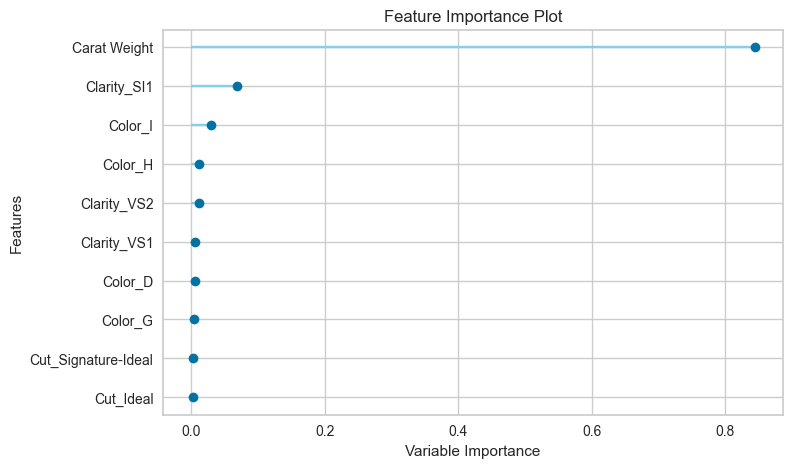

In [ ]:
# check feature importance
plot_model(best, plot = 'feature')

### Finalize the Model and Save It
Finalize the Model: This step locks in the best-performing model, ensuring that it is ready for deployment. The finalize_model() function takes the best model and prepares it by finalizing any pre-processing steps and model tuning.

Save the Model to Disk: The save_model() function saves the finalized model to disk, allowing it to be reused later for making predictions without needing to retrain it. The model is saved with the name 'diamond-pipeline'.

In [ ]:
# finalize the model
final_best = finalize_model(best)

# save model to disk
save_model(final_best, 'diamond-pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                 ('numerical_imputer',
                  TransformerWrapper(include=['Carat Weight'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                              'P...
                 ('onehot_encoding',
                  TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                              'Polish', 'Symmetry'],
                                     transformer=OneHotEncoder(cols=['Cut',
                                                                     'Color',
                                                                     'Clarity',
                                        

### Model management with MLFlow

### Run MLflow UI within Command Prompt

This step launches the **MLflow UI** within the notebook using the `!mlflow ui` command. The **exclamation mark (`!`)** indicates that the command is executed in the shell rather than as Python code.

The **MLflow UI** provides a web interface for visualizing and managing machine learning experiments, allowing you to track and compare different runs, metrics, and models.




#####Run MLflow UI within Command Prompt
Mlflow ui


In [1]:
#localhost:5000

### Consume the model

In [ ]:
# Block 1 - Imports and Setup
import mlflow
import mlflow.sklearn
from pycaret.regression import *
from pycaret.datasets import get_data
import pandas as pd
import os

mlflow.set_tracking_uri("http://localhost:5000")

####**Load and Predict with the Saved MLflow Model**
Load the Model: This step loads the saved model from the MLflow experiment using the model's unique run ID. The mlflow.pyfunc.load_model() function is used to load the model as a PyFuncModel.

Make Predictions: After loading the model, you can use it to make predictions on new data. In this case, the model predicts on a Pandas DataFrame containing the dataset. The predict() function is used to generate predictions based on the input data.

In [ ]:
# Block 2 - Load Data
data = get_data('diamond')

numerical_cols = data.select_dtypes(include='number').columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [ ]:
# Block 3 - Training Code
s = setup(data=data,
         target='Price',
         transform_target=True,
         log_experiment=False)

experiment_name = "diamond_price_prediction"
experiment = mlflow.get_experiment_by_name(experiment_name)
if experiment is None:
    experiment_id = mlflow.create_experiment(experiment_name)
else:
    experiment_id = experiment.experiment_id

model_dir = "./saved_models"
os.makedirs(model_dir, exist_ok=True)

with mlflow.start_run(experiment_id=experiment_id) as run:
    best_model = compare_models()

    mlflow.log_param("model_type", type(best_model).__name__)

    residuals_plot = plot_model(best_model, plot='residuals', save=True)
    feature_plot = plot_model(best_model, plot='feature', save=True)

    if os.path.exists('Residuals.png'):
        mlflow.log_artifact('Residuals.png')
    if os.path.exists('Feature Importance.png'):
        mlflow.log_artifact('Feature Importance.png')

    final_model = finalize_model(best_model)
    model_path = os.path.join(model_dir, 'diamond-pipeline')
    save_model(final_model, model_path)

    mlflow.sklearn.log_model(final_model, "model")

    run_id = run.info.run_id
    print(f"Model training completed. Run ID: {run_id}")

,Description,Value
0,Session id,153
1,Target,Price
2,Target type,Regression
3,Original data shape,"(6000, 8)"
4,Transformed data shape,"(6000, 29)"
5,Transformed train set shape,"(4200, 29)"
6,Transformed test set shape,"(1800, 29)"
7,Numeric features,1
8,Categorical features,6
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,639.0198,1721784.9823,1299.2655,0.9838,0.0666,0.0487,0.2970
et,Extra Trees Regressor,740.7026,2092976.7897,1432.3859,0.9802,0.0795,0.0582,0.6410
rf,Random Forest Regressor,740.2282,2227190.8923,1473.2641,0.9790,0.0787,0.0574,0.5210
gbr,Gradient Boosting Regressor,772.8280,2483498.2497,1553.6989,0.9769,0.0774,0.0575,0.2640
dt,Decision Tree Regressor,958.3996,3690202.5922,1883.1386,0.9652,0.1050,0.0751,0.1050
ada,AdaBoost Regressor,2050.8192,17564108.4789,4153.4413,0.8362,0.1925,0.1543,0.2750
knn,K Neighbors Regressor,3087.2386,36049669.6852,5993.7505,0.6570,0.3619,0.2331,0.1240
omp,Orthogonal Matching Pursuit,3363.8772,83781881.9295,8966.9289,0.1922,0.2806,0.2208,0.1260
lasso,Lasso Regression,6692.6556,119415392.2281,10901.3672,-0.1284,0.7177,0.5680,0.1080
en,Elastic Net,6692.6556,119415392.2281,10901.3672,-0.1284,0.7177,0.5680,0.1180


Transformation Pipeline and Model Successfully Saved


2025/02/08 14:59:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model training completed. Run ID: 832cbf49d03f465aa10e5d20de20c759
🏃 View run intrigued-turtle-367 at: http://localhost:5000/#/experiments/151525864346649219/runs/832cbf49d03f465aa10e5d20de20c759
🧪 View experiment at: http://localhost:5000/#/experiments/151525864346649219


In [ ]:
# Block 4 - Prediction Function
def predict_with_model(model_path=None):
    if model_path is None:
        model_path = os.path.join(model_dir, 'diamond-pipeline')

    loaded_model = load_model(model_path)

    data = get_data('diamond')
    test_data = data.copy()
    if 'Price' in test_data.columns:
        test_data.drop('Price', axis=1, inplace=True)

    predictions = predict_model(loaded_model, data=test_data)
    return predictions

In [ ]:
# Block 5 - Make Predictions
print("\nMaking predictions...")
predictions = predict_with_model()
print("\nSample predictions:")
print(predictions.head())


Making predictions...
Transformation Pipeline and Model Successfully Loaded


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171



Sample predictions:
   Carat Weight    Cut Color Clarity Polish Symmetry Report  prediction_label
0          1.10  Ideal     H     SI1     VG       EX    GIA       5421.280172
1          0.83  Ideal     H     VS1     ID       ID   AGSL       3569.891342
2          0.85  Ideal     H     SI1     EX       EX    GIA       3341.587732
3          0.91  Ideal     E     SI1     VG       VG    GIA       4531.185124
4          0.83  Ideal     G     SI1     EX       EX    GIA       3256.250454


In [ ]:
# Block 6 - View MLflow Runs
experiment = mlflow.get_experiment_by_name("diamond_price_prediction")
runs = mlflow.search_runs(experiment_ids=[experiment.experiment_id])
print("\nMLflow runs:")
print(runs[['run_id', 'status', 'start_time']])


MLflow runs:
                             run_id    status                       start_time
0  832cbf49d03f465aa10e5d20de20c759  FINISHED 2025-02-08 09:28:55.449000+00:00
1  d54635427f1e43d3842dfd1578990ee6  FINISHED 2025-02-08 09:18:05.629000+00:00
